## ICC Men's T20 World Cup Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
plt.style.use("ggplot")

### About Dataset

ICC Men's T20 World Cup Dataset

This dataset contains detailed information about the matches played in the ICC Men's T20 World Cup. It includes the following columns:

Match No.: The sequential number of the match.
    
Date: The date when the match was played.
    
Venue: The location where the match took place.
    
1st Team: The team that batted first.

2nd Team: The team that batted second.
    
Stage: The stage of the tournament (e.g., Group A, Group B, etc.).

Toss: The team that won the toss.

Winning Toss Decision: The decision made by the team winning the toss (e.g., Batting, Fielding).

First Innings Score: The score made by the team batting first.
    
Fall of Wickets First Innings: The number of wickets fallen in the first innings.
    
Second Innings Score: The score made by the team batting second.
    
Fall of Wickets Second Innings: The number of wickets fallen in the second innings.
    
Winners: The team that won the match.
    
Method: The method by which the match was decided (e.g., Normal Match or Duckworth Lewis Stern (DLS)).

Won by: The method of victory (e.g., Runs, Wickets).

Winning Margin: The margin of victory.
    
Top Scorer: The player with the highest score in the match.

Highest Score: The highest individual score made by a player in the match.

Best Bowler: The player with the best bowling performance.
    
Best Bowler Figure: The bowling figures of the best bowler.

Player Of The Match: The player adjudged as the best performer of the match.


This dataset provides comprehensive insights into the performances of teams and players during the ICC Men's T20 World Cup, making it a valuable resource for sports analysts and cricket enthusiasts. ​



In [3]:
df=pd.read_csv("C:/Users/Ranesh/OneDrive/Desktop/Datasets/Datasets/ICC Mens T20 Worldcup.csv")
df.sample(2)

,Match No.,Date,Venue,1st Team,2nd Team,Stage,Toss Winning,Toss Decision,First Innings Score,Fall of wickets First Innings,...,Winners,Method,Won by,Winning Margin,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match
29,30th,"Friday,June 14,2024",Central Broward Regional Park Stadium Turf Gro...,United State Of America,Ireland,Group A,Rain,Rain,Rain,Rain,...,Rain,Rain,Rain,Rain,Rain,Rain,Rain,Rain,Rain,Rain
46,47th,"Saturday,June 22,2024","Sir Vivian Richards Stadium, North Sound, Antigua",India,Bangladesh,Group 1,Bangladesh,Fielding,196,5,...,India,Normal Match,Runs,50,Hardik Pandya,50,Kuldeep Yadav,3,19,Hardik Pandya


In [4]:
print(df.columns)
df.info()

Index(['Match No.', 'Date', 'Venue', '1st Team', '2nd Team', 'Stage',
       'Toss Winning', 'Toss Decision', 'First Innings Score',
       'Fall of wickets First Innings', 'Second Innings Score',
       'Fall of wickets Second Innings', 'Winners', 'Method', 'Won by',
       'Winning Margin', 'Top Scorer', 'Highest Score', 'Best Bowler',
       'Best Bowler Figure(Wickets Taken)',
       'Best Bowler Figure(Runs Recieved)', 'Player Of The Match'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Match No.                          55 non-null     object
 1   Date                               55 non-null     object
 2   Venue                              55 non-null     object
 3   1st Team                           55 non-null     object
 4   2nd Team                           55 no

In [5]:
col=['Match No.', 'First Innings Score',
       'Fall of wickets First Innings', 'Second Innings Score',
       'Fall of wickets Second Innings',
       'Winning Margin', 'Highest Score',
       'Best Bowler Figure(Wickets Taken)',
       'Best Bowler Figure(Runs Recieved)']
df[col]=df[col].apply(pd.to_numeric,errors="coerce")

In [6]:
df.columns

Index(['Match No.', 'Date', 'Venue', '1st Team', '2nd Team', 'Stage',
       'Toss Winning', 'Toss Decision', 'First Innings Score',
       'Fall of wickets First Innings', 'Second Innings Score',
       'Fall of wickets Second Innings', 'Winners', 'Method', 'Won by',
       'Winning Margin', 'Top Scorer', 'Highest Score', 'Best Bowler',
       'Best Bowler Figure(Wickets Taken)',
       'Best Bowler Figure(Runs Recieved)', 'Player Of The Match'],
      dtype='object')

In [7]:
df[["Day","date"]]=df["Date"].str.split(",",expand=True,n=1)

In [8]:
print(df.isnull().sum())

Match No.                            55
Date                                  0
Venue                                 0
1st Team                              0
2nd Team                              0
Stage                                 0
Toss Winning                          0
Toss Decision                         0
First Innings Score                   3
Fall of wickets First Innings         3
Second Innings Score                  4
Fall of wickets Second Innings        4
Winners                               0
Method                                0
Won by                                0
Winning Margin                        4
Top Scorer                            0
Highest Score                         4
Best Bowler                           0
Best Bowler Figure(Wickets Taken)     4
Best Bowler Figure(Runs Recieved)     4
Player Of The Match                   0
Day                                   0
date                                  0
dtype: int64


In [9]:
df.describe()

,Match No.,First Innings Score,Fall of wickets First Innings,Second Innings Score,Fall of wickets Second Innings,Winning Margin,Highest Score,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved)
count,0.0,52.000000,52.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,NaN,133.865385,7.423077,116.372549,5.764706,22.882353,53.607843,3.764706,17.098039
std,NaN,44.012043,2.320802,37.835941,3.140626,31.727998,19.130163,4.329380,8.488239
min,NaN,40.000000,0.000000,39.000000,0.000000,1.000000,20.000000,1.000000,0.000000
25%,NaN,106.000000,5.000000,98.500000,3.000000,6.000000,42.500000,3.000000,11.500000
50%,NaN,131.500000,7.000000,113.000000,6.000000,8.000000,50.000000,3.000000,16.000000
75%,NaN,166.250000,10.000000,135.000000,8.000000,24.500000,64.500000,4.000000,21.000000
max,NaN,218.000000,10.000000,197.000000,10.000000,134.000000,98.000000,30.000000,40.000000


In [18]:
total_teams=[]
without_rn=df[~(df['Winners']=='Rain')]
tot1=pd.DataFrame(without_rn['1st Team'].value_counts())
tot2=pd.DataFrame(without_rn['2nd Team'].value_counts())
tot1.index,tot2.index
[total_teams.append(x) for x in tot1.index]
[total_teams.append(x) for x in tot2.index]
total_teams_index=set(total_teams)
len(total_teams_index)

20

### Total 20 teams participated in the tournment

In [12]:
print("Total Stadium Count",len(df['Venue'].value_counts()))
stadiums=df['Venue'].value_counts()
stadiums

Total Stadium Count 9


Venue
Kensington Oval, Bridgetown, Barbados                            9
Nassau County International Cricket Stadium, New York            8
Sir Vivian Richards Stadium, North Sound, Antigua                8
Providence Stadium, Guyana                                       6
Daren Sammy National Cricket Stadium, Gros Islet, St Lucia       6
Brian Lara Stadium, Tarouba, Trinidad                            5
Arnos Vale Ground, Kingstown, St Vincent                         5
Grand Prairie Stadium, Dallas                                    4
Central Broward Regional Park Stadium Turf Ground, Lauderhill    4
Name: count, dtype: int64

#### The ICC Men's T20 World Cup was played across 9 stadiums.

In [14]:
rain_count_on_stdum=df[df['Method']=='Rain']['Venue'].value_counts()
rain_count_on_stdum
((rain_count_on_stdum*100)/stadiums).dropna()

Venue
Central Broward Regional Park Stadium Turf Ground, Lauderhill    75.000000
Kensington Oval, Bridgetown, Barbados                            11.111111
Name: count, dtype: float64

#### 75% of the matches played in Lauderhill were declared by rain.

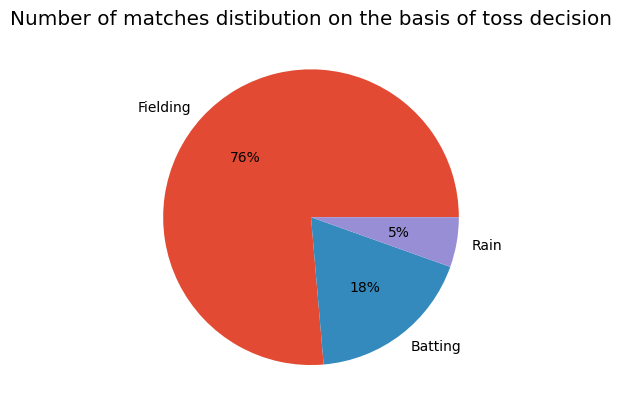

In [26]:
toss=df["Toss Decision"].value_counts()
labels=toss.index
values=toss.values
plt.pie(x=values,labels=labels,autopct='%.0f%%')
plt.title("Number of matches distibution on the basis of toss decision")
plt.show()

#### As per the graph, 82% of the matches the toss decion was to field first while 18% matches had a batting first option

In [32]:
toss_by_ground=pd.DataFrame(without_rn.groupby('Venue')['Toss Decision'].value_counts())
total_played_matches=[]
for i in range(len(toss_by_ground)):
    name=toss_by_ground.index[i][0]
    total_played=toss_by_ground.loc[name]['count'].sum()
    total_played_matches.append(total_played)
toss_by_ground['total_played_matches']=total_played_matches
toss_by_ground['decision_on_toss_percentage']=(toss_by_ground['count']*100/toss_by_ground['total_played_matches']).round(2)
toss_by_ground

count  \
Venue                                              Toss Decision          
Arnos Vale Ground, Kingstown, St Vincent           Fielding           4   
                                                   Batting            1   
Brian Lara Stadium, Tarouba, Trinidad              Fielding           4   
                                                   Batting            1   
Central Broward Regional Park Stadium Turf Grou... Fielding           1   
Daren Sammy National Cricket Stadium, Gros Isle... Fielding           6   
Grand Prairie Stadium, Dallas                      Fielding           4   
Kensington Oval, Bridgetown, Barbados              Fielding           5   
                                                   Batting            3   
Nassau County International Cricket Stadium, Ne... Fielding           6   
                                                   Batting            2   
Providence Stadium, Guyana                         Fielding           5   
                                                   Batting            1   
Sir Vivian Richards Stadium, North Sound, Antigua  Fielding           7   
                                                   Batting            1   

                                                                  total_played_matches  \
Venue                                              Toss Decision                         
Arnos Vale Ground, Kingstown, St Vincent           Fielding                          5   
                                                   Batting                           5   
Brian Lara Stadium, Tarouba, Trinidad              Fielding                          5   
                                                   Batting                           5   
Central Broward Regional Park Stadium Turf Grou... Fielding                          1   
Daren Sammy National Cricket Stadium, Gros Isle... Fielding                          6   
Grand Prairie Stadium, Dallas                      Fielding                          4   
Kensington Oval, Bridgetown, Barbados              Fielding                          8   
                                                   Batting                           8   
Nassau County International Cricket Stadium, Ne... Fielding                          8   
                                                   Batting                           8   
Providence Stadium, Guyana                         Fielding                          6   
                                                   Batting                           6   
Sir Vivian Richards Stadium, North Sound, Antigua  Fielding                          8   
                                                   Batting                           8   

                                                                  decision_on_toss_percentage  
Venue                                              Toss Decision                               
Arnos Vale Ground, Kingstown, St Vincent           Fielding                             80.00  
                                                   Batting                              20.00  
Brian Lara Stadium, Tarouba, Trinidad              Fielding                             80.00  
                                                   Batting                              20.00  
Central Broward Regional Park Stadium Turf Grou... Fielding                            100.00  
Daren Sammy National Cricket Stadium, Gros Isle... Fielding                            100.00  
Grand Prairie Stadium, Dallas                      Fielding                            100.00  
Kensington Oval, Bridgetown, Barbados              Fielding                             62.50  
                                                   Batting                              37.50  
Nassau County International Cricket Stadium, Ne... Fielding                             75.00  
                                                   Batting                              25.00  
Providence 

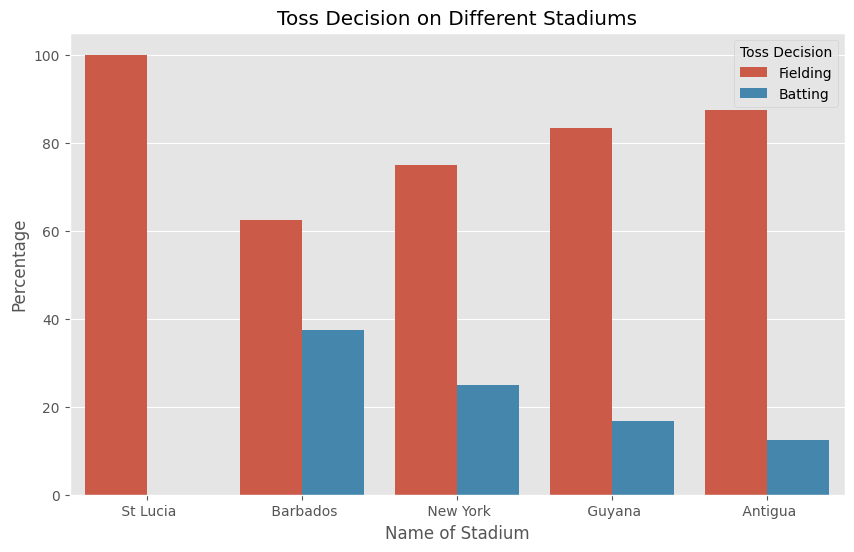

In [34]:
toss_by_ground=toss_by_ground[toss_by_ground['total_played_matches']>=6]
toss_by_ground=toss_by_ground.reset_index()
Venue=[]
for i in toss_by_ground['Venue']:
    Venue.append(i.split(",")[-1])
toss_by_ground['Venue']=Venue
plt.figure(figsize=(10,6))
sns.barplot(data=toss_by_ground,x='Venue',y='decision_on_toss_percentage',hue='Toss Decision')
plt.title("Toss Decision on Different Stadiums")
plt.xlabel('Name of Stadium')
plt.ylabel('Percentage')
plt.show()

#### In St Lucia, all team who win the toss chooses Fielding. On winning toss, team usually choose Fielding.

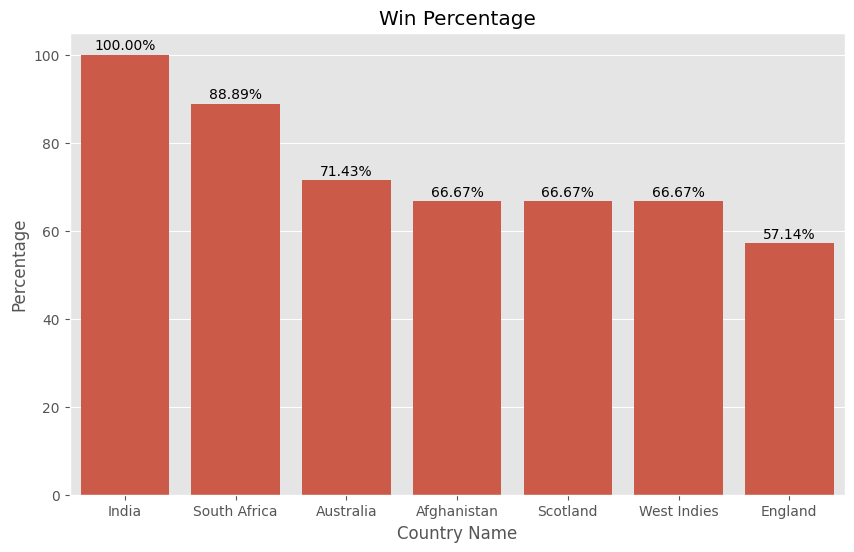

In [28]:
win_participate=pd.DataFrame(without_rn["Winners"].value_counts())
participation=tot1.add(tot2,fill_value=0).astype(int)
win_percentage=(win_participate*100).divide(participation,fill_value=0).sort_values('count',ascending=False)
win_percentage
plt.figure(figsize=(10,6))
barplot=sns.barplot(data=win_percentage.iloc[0:7,:],x=win_percentage.iloc[0:7,:].index,y='count')
for index, value in enumerate(win_percentage.iloc[0:7]['count']):
    barplot.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)
plt.title("Win Percentage")
plt.xlabel('Country Name')
plt.ylabel('Percentage')
plt.show()

#### India has won all the matches they have played

In [40]:
total_runs=without_rn['First Innings Score'].astype(int).sum()+without_rn['Second Innings Score'].astype(int).sum()
average_runs_per_match=total_runs/(len(without_rn['First Innings Score'])+len(without_rn['Second Innings Score']))
total_wickets=without_rn['Fall of wickets First Innings'].astype(int).sum()+without_rn['Fall of wickets Second Innings'].astype(int).sum()
average_wickets_per_match=total_wickets/(len(without_rn['Fall of wickets First Innings'])+len(without_rn['Fall of wickets Second Innings']))
print("Total Runs: ",total_runs,"\nAverage Runs per Match: ",int(np.ceil(average_runs_per_match)),"\nTotal Wickets: ",total_wickets,"\nAverage Wickets per Match: ",int(np.ceil(average_wickets_per_match)))

Total Runs:  12806 
Average Runs per Match:  126 
Total Wickets:  680 
Average Wickets per Match:  7


#### This T20 World Cup was dominated by bowlers as Average Runs per match were close to just 126 runs while per match wickets were 7.

In [43]:
without_rn['Won by'].value_counts()

Won by
Runs       26
Wickets    25
Name: count, dtype: int64

In [45]:
run_wins=without_rn[without_rn['Won by']=='Runs']
avg_runs_won_by=run_wins['Winning Margin'].astype(int).mean()
run_wins=without_rn[without_rn['Won by']=='Wickets']
avg_wickets_won_by=run_wins['Winning Margin'].astype(int).mean()
print("Average Runs difference of winning: ",int(np.ceil(avg_runs_won_by)),"\nAverage Wickets difference of winning: ",int(np.ceil(avg_wickets_won_by)))

Average Runs difference of winning:  39 
Average Wickets difference of winning:  7


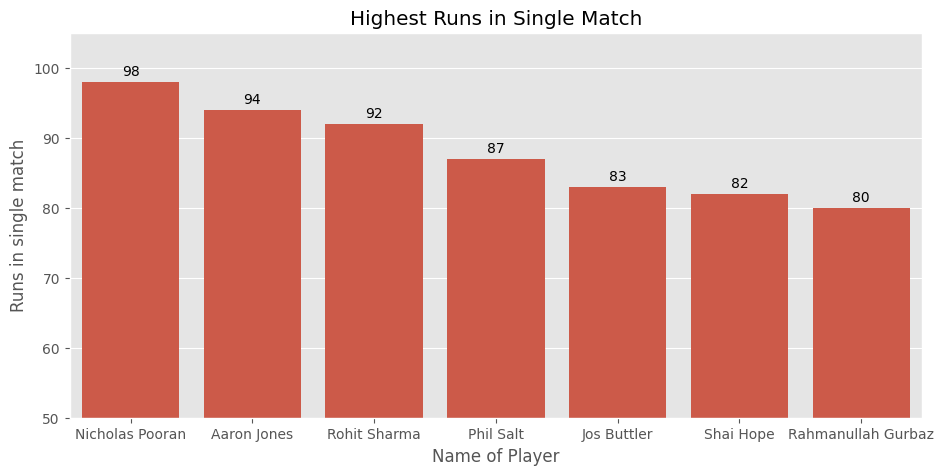

In [47]:
highest_run_score_per_match=without_rn.sort_values("Highest Score",ascending=False)
highest_run_score_per_match=highest_run_score_per_match.iloc[:7,[16,17]]
highest_run_score_per_match['Highest Score']=highest_run_score_per_match['Highest Score'].astype(int)
plt.figure(figsize=(11,5))
highrunplot=sns.barplot(data=highest_run_score_per_match,x='Top Scorer',y='Highest Score')
for index, value in enumerate(highest_run_score_per_match['Highest Score']):
    highrunplot.text(index, value + 0.5, f'{value}', ha='center', va='bottom', fontsize=10)
plt.title("Highest Runs in Single Match")
plt.xlabel('Name of Player')
plt.ylim(50,105)
plt.ylabel('Runs in single match')
plt.show()

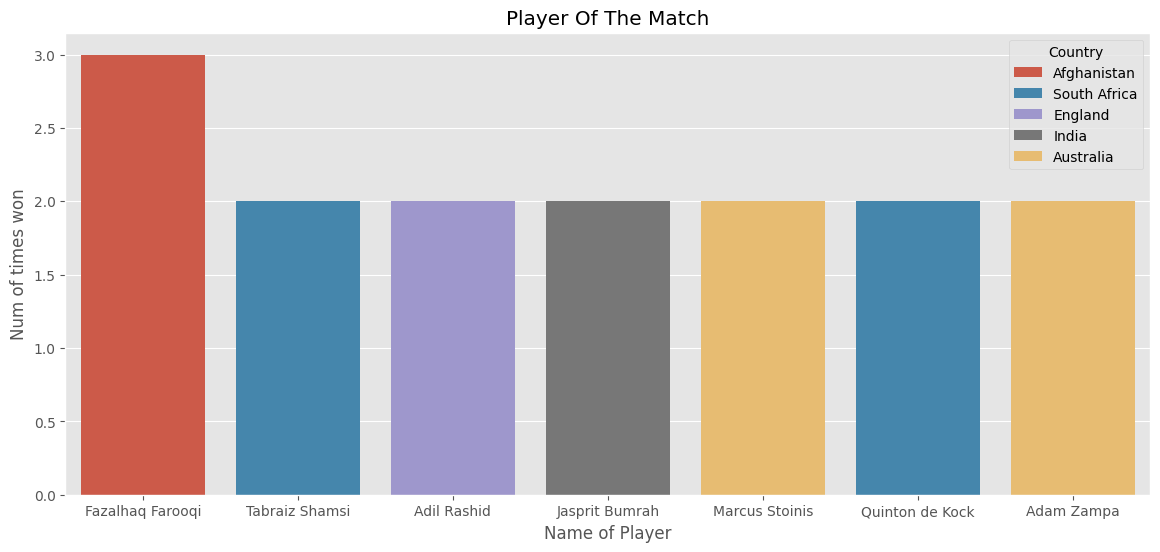

In [51]:
player_of_match_tournmnt=pd.DataFrame(df['Player Of The Match'].value_counts().drop('Rain',axis=0).reset_index())
player_of_match_tournmnt=player_of_match_tournmnt[player_of_match_tournmnt['count']>=2]
player_of_match_tournmnt=pd.merge(player_of_match_tournmnt,df[['Winners','Player Of The Match']],on='Player Of The Match',how='inner').drop_duplicates("Player Of The Match",keep='first').reset_index().drop(['index'],axis=1)
(player_of_match_tournmnt.rename({'Winners':"Country"},axis=1,inplace=True))
player_of_match_tournmnt.index = range(1, len(player_of_match_tournmnt) + 1)
plt.figure(figsize=(14,6))
sns.barplot(data=player_of_match_tournmnt,x='Player Of The Match',y='count',hue='Country')
plt.title('Player Of The Match')
plt.xlabel('Name of Player')
plt.ylabel('Num of times won')
plt.show()

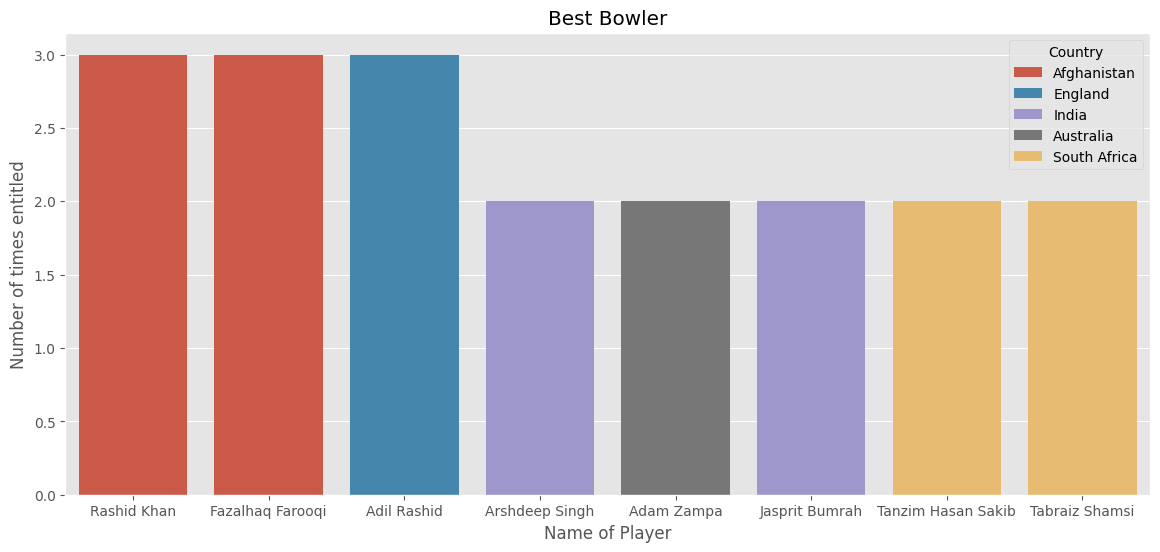

In [55]:
bowler_of_match_tournmnt=pd.DataFrame(df['Best Bowler'].value_counts().drop('Rain',axis=0).reset_index())
bowler_of_match_tournmnt=bowler_of_match_tournmnt[bowler_of_match_tournmnt['count']>=2]
bowler_of_match_tournmnt=pd.merge(bowler_of_match_tournmnt,df[['Winners','Best Bowler']],on='Best Bowler',how='inner').drop_duplicates("Best Bowler",keep='first').reset_index().drop(['index'],axis=1)
(bowler_of_match_tournmnt.rename({'Winners':"Country"},axis=1,inplace=True))
bowler_of_match_tournmnt.index = range(1, len(bowler_of_match_tournmnt) + 1)
plt.figure(figsize=(14,6))
sns.barplot(data=bowler_of_match_tournmnt,x='Best Bowler',y='count',hue='Country')
plt.title('Best Bowler')
plt.xlabel('Name of Player')
plt.ylabel('Number of times entitled')
plt.show()